c:\Users\Admin\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Training 2 Layers (ReLU)...
Epoch 1/10, Train Loss: 1.0011, Val Loss: 0.5665, Train Acc: 0.8616, Val Acc: 0.8575
Epoch 2/10, Train Loss: 0.4763, Val Loss: 0.4294, Train Acc: 0.8900, Val Acc: 0.8844
Epoch 3/10, Train Loss: 0.3915, Val Loss: 0.3798, Train Acc: 0.8983, Val Acc: 0.8938
Epoch 4/10, Train Loss: 0.3518, Val Loss: 0.3506, Train Acc: 0.9060, Val Acc: 0.9006
Epoch 5/10, Train Loss: 0.3262, Val Loss: 0.3318, Train Acc: 0.9110, Val Acc: 0.9051
Epoch 6/10, Train Loss: 0.3084, Val Loss: 0.3160, Train Acc: 0.9155, Val Acc: 0.9092
Epoch 7/10, Train Loss: 0.2938, Val Loss: 0.3043, Train Acc: 0.9195, Val Acc: 0.9126
Epoch 8/10, Train Loss: 0.2814, Val Loss: 0.2934, Train Acc: 0.9226, Val Acc: 0.9171
Epoch 9/10, Train Loss: 0.2703, Val Loss: 0.2833, Train Acc: 0.9258, Val Acc: 0.9196
Epoch 10/10, Train Loss: 0.2608, Val Loss: 0.2778, Train Acc: 0.9268, Val Acc: 0.9225


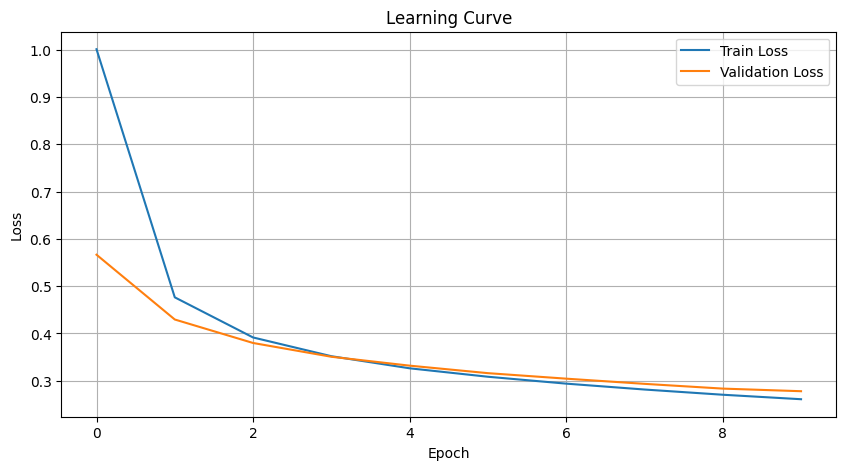

2 Layers (ReLU) - Test Accuracy: 0.9246

Training 3 Layers (ReLU)...
Epoch 1/10, Train Loss: 0.9130, Val Loss: 0.4593, Train Acc: 0.8797, Val Acc: 0.8770
Epoch 2/10, Train Loss: 0.3818, Val Loss: 0.3533, Train Acc: 0.9030, Val Acc: 0.9006
Epoch 3/10, Train Loss: 0.3135, Val Loss: 0.3105, Train Acc: 0.9156, Val Acc: 0.9129
Epoch 4/10, Train Loss: 0.2768, Val Loss: 0.2817, Train Acc: 0.9242, Val Acc: 0.9204
Epoch 5/10, Train Loss: 0.2518, Val Loss: 0.2594, Train Acc: 0.9310, Val Acc: 0.9260
Epoch 6/10, Train Loss: 0.2316, Val Loss: 0.2503, Train Acc: 0.9349, Val Acc: 0.9289
Epoch 7/10, Train Loss: 0.2149, Val Loss: 0.2300, Train Acc: 0.9410, Val Acc: 0.9343
Epoch 8/10, Train Loss: 0.2004, Val Loss: 0.2186, Train Acc: 0.9449, Val Acc: 0.9391
Epoch 9/10, Train Loss: 0.1879, Val Loss: 0.2093, Train Acc: 0.9484, Val Acc: 0.9417
Epoch 10/10, Train Loss: 0.1762, Val Loss: 0.1978, Train Acc: 0.9510, Val Acc: 0.9429


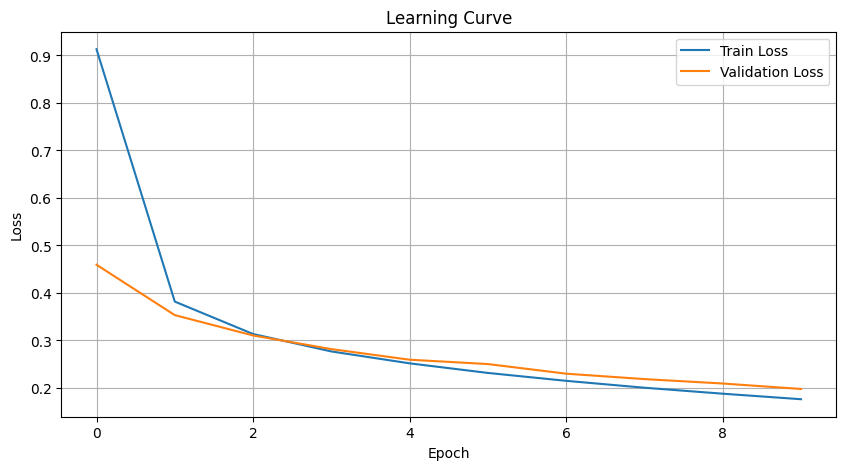

3 Layers (ReLU) - Test Accuracy: 0.9462

Training 2 Layers (Tanh)...
Epoch 1/10, Train Loss: 0.9136, Val Loss: 0.5577, Train Acc: 0.8661, Val Acc: 0.8629
Epoch 2/10, Train Loss: 0.4774, Val Loss: 0.4401, Train Acc: 0.8868, Val Acc: 0.8811
Epoch 3/10, Train Loss: 0.4018, Val Loss: 0.3932, Train Acc: 0.8964, Val Acc: 0.8901
Epoch 4/10, Train Loss: 0.3646, Val Loss: 0.3662, Train Acc: 0.9030, Val Acc: 0.8967
Epoch 5/10, Train Loss: 0.3418, Val Loss: 0.3489, Train Acc: 0.9060, Val Acc: 0.9006
Epoch 6/10, Train Loss: 0.3250, Val Loss: 0.3332, Train Acc: 0.9108, Val Acc: 0.9046
Epoch 7/10, Train Loss: 0.3117, Val Loss: 0.3228, Train Acc: 0.9147, Val Acc: 0.9076
Epoch 8/10, Train Loss: 0.3005, Val Loss: 0.3126, Train Acc: 0.9172, Val Acc: 0.9101
Epoch 9/10, Train Loss: 0.2912, Val Loss: 0.3044, Train Acc: 0.9195, Val Acc: 0.9123
Epoch 10/10, Train Loss: 0.2828, Val Loss: 0.2985, Train Acc: 0.9217, Val Acc: 0.9139


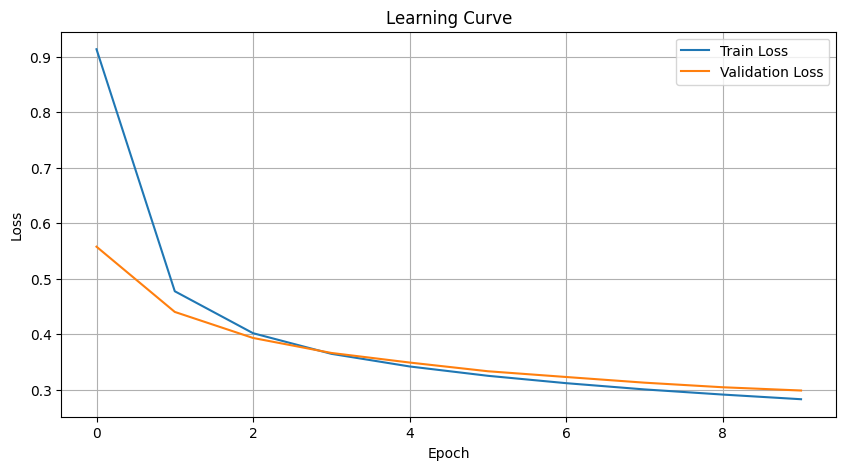

2 Layers (Tanh) - Test Accuracy: 0.9196

Final Results:
2 Layers (ReLU): Test Accuracy = 0.9246
3 Layers (ReLU): Test Accuracy = 0.9462
2 Layers (Tanh): Test Accuracy = 0.9196

Visualizing predictions from best model: 3 Layers (ReLU)


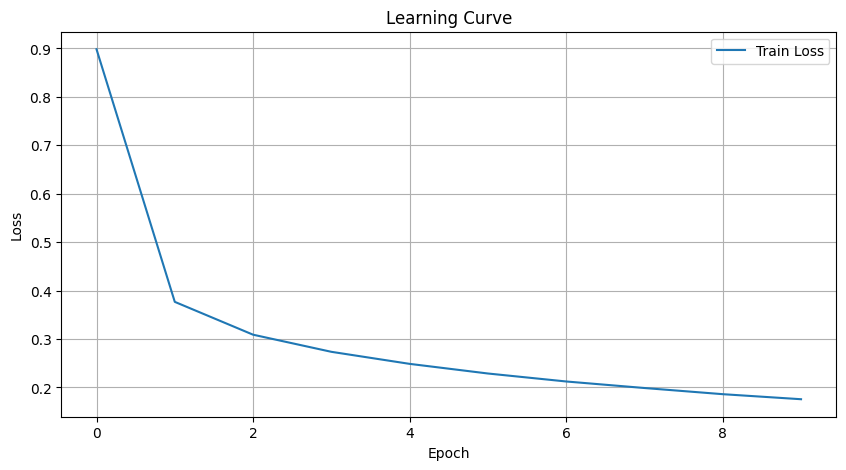

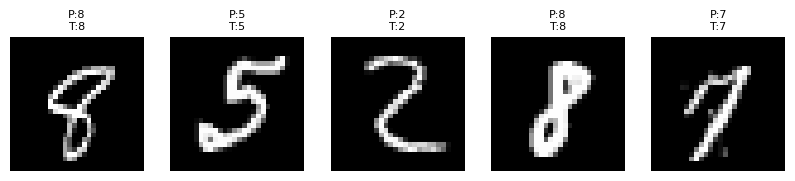

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Activation functions
class ReLU:
    def __call__(self, x):
        return np.maximum(0, x)
    def gradient(self, x):
        return (x > 0).astype(float)

class Sigmoid:
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))
    def gradient(self, x):
        s = self.__call__(x)
        return s * (1 - s)

class Tanh:
    def __call__(self, x):
        return np.tanh(x)
    def gradient(self, x):
        return 1 - np.tanh(x)**2

class Softmax:
    def __call__(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    #
    

# Initializers
class HeInitializer:
    def __call__(self, shape):
        fan_in = shape[0]
        return np.random.randn(*shape) * np.sqrt(2.0 / fan_in)

class XavierInitializer:
    def __call__(self, shape):
        fan_in, fan_out = shape[0], shape[1]
        limit = np.sqrt(6.0 / (fan_in + fan_out))
        return np.random.uniform(-limit, limit, size=shape)

# Optimizer
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# NN Implementation 
class NeuralNetwork:
    def __init__(self, layers, activations, initializer=HeInitializer(), optimizer=SGD(),
                 learning_rate=0.01, batch_size=32, epochs=10, verbose=True):
        self.layers = layers
        self.activations = activations
        self.initializer = initializer
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.verbose = verbose
        self.weights = []
        self.biases = []

    def initialize_parameters(self):
        self.weights = []
        self.biases = []
        for i in range(len(self.layers) - 1):
            self.weights.append(self.initializer((self.layers[i], self.layers[i + 1])))
            self.biases.append(np.zeros((1, self.layers[i + 1])))

    def forward(self, X):
        self.cache = {'A0': X}
        A = X
        for i in range(len(self.weights) - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = self.activations[i](Z)
            self.cache[f'Z{i + 1}'] = Z
            self.cache[f'A{i + 1}'] = A

        #softmax
        Z = np.dot(A, self.weights[-1]) + self.biases[-1]
        A = Softmax()(Z)  
        self.cache[f'Z{len(self.weights)}'] = Z
        self.cache[f'A{len(self.weights)}'] = A
        return A

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # Numerical stability improvement for log
        return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

    def backward(self, y_true):
        grads = {'weights': [], 'biases': []}
        m = y_true.shape[0]

        # Output layer gradient
        dZ = self.cache[f'A{len(self.weights)}'] - y_true
        grads['weights'].insert(0, np.dot(self.cache[f'A{len(self.weights) - 1}'].T, dZ) / m)
        grads['biases'].insert(0, np.sum(dZ, axis=0, keepdims=True) / m)

        #
        for i in reversed(range(len(self.weights) - 1)):
            dA = np.dot(dZ, self.weights[i + 1].T)
            dZ = dA * self.activations[i].gradient(self.cache[f'Z{i + 1}'])
            grads['weights'].insert(0, np.dot(self.cache[f'A{i}'].T, dZ) / m)
            grads['biases'].insert(0, np.sum(dZ, axis=0, keepdims=True) / m)

        return grads

    def update_parameters(self, grads):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * grads['weights'][i]
            self.biases[i] -= self.learning_rate * grads['biases'][i]

    def fit(self, X, y, X_val=None, y_val=None):
        X = X.values if hasattr(X, 'values') else X
        y = y.values if hasattr(y, 'values') else y

        self.initialize_parameters()
        self.optimizer.lr = self.learning_rate

        history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

        for epoch in range(self.epochs):
            # Shuffle data
            perm = np.random.permutation(len(X))
            X_shuffled = X[perm]
            y_shuffled = y[perm]

            batch_losses = []
            for i in range(0, len(X), self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward pass
                y_pred = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y_pred)
                batch_losses.append(loss)

                # Backward pass
                grads = self.backward(y_batch)

                # Update parameters
                self.update_parameters(grads)

            # Metrics
            train_loss = np.mean(batch_losses)
            train_pred = np.argmax(self.forward(X), axis=1)
            train_acc = accuracy_score(np.argmax(y, axis=1), train_pred)

            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)

            if X_val is not None and y_val is not None:
                val_pred = self.forward(X_val)
                val_loss = self.compute_loss(y_val, val_pred)
                val_acc = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))
                history['val_loss'].append(val_loss)
                history['val_acc'].append(val_acc)

            if self.verbose:
                if X_val is not None:
                    print(f"Epoch {epoch + 1}/{self.epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
                else:
                    print(f"Epoch {epoch + 1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

        self._plot_learning_curve(history)
        return history

    def predict(self, X):
        X = X.values if hasattr(X, 'values') else X
        return np.argmax(self.forward(X), axis=1)

    def _plot_learning_curve(self, history):
        plt.figure(figsize=(10, 5))
        plt.plot(history['train_loss'], label='Train Loss')
        if history['val_loss']:
            plt.plot(history['val_loss'], label='Validation Loss')
        plt.title("Learning Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()

# MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

# Reshape y
y = y.reshape(-1, 1)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False) 
y_encoded = encoder.fit_transform(y)

# Train/val/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Network configurations
configurations = [
    {
        'name': '2 Layers (ReLU)',
        'layers': [784, 128, 10],
        'activations': [ReLU(), ReLU()],
        'initializer': HeInitializer(),
        'optimizer': SGD(lr=0.01),
        'epochs': 10,
        'batch_size': 64
    },
    {
        'name': '3 Layers (ReLU)',
        'layers': [784, 256, 128, 10],
        'activations': [ReLU(), ReLU(), ReLU()],
        'initializer': HeInitializer(),
        'optimizer': SGD(lr=0.01),
        'epochs': 10,
        'batch_size': 64
    },
    {
        'name': '2 Layers (Tanh)',
        'layers': [784, 128, 10],
        'activations': [Tanh(), Tanh()],
        'initializer': XavierInitializer(),
        'optimizer': SGD(lr=0.01),
        'epochs': 10,
        'batch_size': 64
    }
]

# Training
results = []
for config in configurations:
    print(f"\nTraining {config['name']}...")
    nn = NeuralNetwork(
        layers=config['layers'],
        activations=config['activations'],
        initializer=config['initializer'],
        optimizer=config['optimizer'],
        learning_rate=0.01,
        batch_size=config['batch_size'],
        epochs=config['epochs'],
        verbose=True
    )

    history = nn.fit(X_train, y_train, X_val, y_val)

    y_pred = nn.predict(X_test)
    test_acc = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append((config['name'], test_acc))
    print(f"{config['name']} - Test Accuracy: {test_acc:.4f}")

#results
print("\nFinal Results:")
for name, acc in results:
    print(f"{name}: Test Accuracy = {acc:.4f}")

#predictions from the best model
best_idx = np.argmax([acc for _, acc in results])
best_config = configurations[best_idx]
print(f"\nVisualizing predictions from best model: {best_config['name']}")

nn = NeuralNetwork(
    layers=best_config['layers'],
    activations=best_config['activations'],
    initializer=best_config['initializer'],
    optimizer=best_config['optimizer'],
    learning_rate=0.01,
    batch_size=best_config['batch_size'],
    epochs=best_config['epochs'],
    verbose=False
)
nn.fit(X_train, y_train)

#predictions
sample_indices = np.random.choice(len(X_test), 5, replace=False)
plt.figure(figsize=(10, 3))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    pred = nn.predict(X_test[idx].reshape(1, -1))[0]
    true = np.argmax(y_test[idx])
    plt.title(f"P:{pred}\nT:{true}", fontsize=8)
    plt.axis('off')
plt.show()